In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import uproot
from scipy.optimize import curve_fit


/home/rhythm/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [18]:
ucnaP = {
 #   "1": "/home/rhythm/Research/ml/research/2024/mar/uniformcosThDistributionMar22/ucnaP_asymmetry.root",#ucnaP-cosTh-5kevbinwidth10kev100Mil.root",/home/rhythm/Research/ml/research/2024/mar/checking-eventgenchangeddd/ucnaP_asymmetry_eventgenchanged_mar27_largeFiles.root
# "1": "/home/rhythm/Research/ml/research/2024/mar/checking-eventgenchangeddd/ucnaP_asymmetry_eventGenChanged_90Million.root",#ucnaP-cosTh-5kevbinwidth10kev100Mil.root",
# "1" :  "/home/rhythm/Research/ml/research/2024/apr/ucnaP_asymmetry_eventGenChanged_80Million_includingAllType_binwidth10kev.root", # 1keV
# "2" : "/home/rhythm/Research/ml/research/2024/apr/ucnaP_asymmetry_eventGenChanged_80Million_includingAllType_binwidth10kev_Ethr20.root",
# "3" : "/home/rhythm/Research/ml/research/2024/apr/ucnaP_asymmetry_eventGenChanged_80Million_includingAllType_binwidth10kev_Ethr30.root"
   
}

In [2]:
ucnaP = {
  "1": "/home/rhythm/Research/ml/research/2024/apr/energy-costh-deadevents-apr09/ucnaP_asymmetry_og_foil_pos_changed.root"}

# definign keys

In [19]:
keys_asymm = ["KE"EdepType01Thr0;1","EdepType02Thr0;1"]#['KE;1', 'eTrue1;1', 'eTrue2;1','EdepType01;1',
# 'EdepType02;1','misEdepType01;1','misEdepType02;1','direct01;1','direct02;1',
#'misEdepType11;1','misEdepType12;1',]

SyntaxError: invalid syntax (<ipython-input-19-093fe0f682aa>, line 1)

In [4]:
#converting them to df
ucna_p_1 = uproot.open(ucnaP["1"])


keys = ucna_p_1.keys()
keys

['KE;1',
 'eTrue1;1',
 'eTrue2;1',
 'KE_dead1;1',
 'KE_dead2;1',
 'EdepType01;1',
 'EdepType11;1',
 'EdepType02;1',
 'EdepType12;1',
 'EdepType0;1',
 'EdepType1;1',
 'misEdepType01;1',
 'misEdepType11;1',
 'misEdepType02;1',
 'misEdepType12;1',
 'direct01;1',
 'direct11;1',
 'direct02;1',
 'direct12;1',
 'pzE;1',
 'pz11;1',
 'pz12;1',
 'pz01;1',
 'pz02;1',
 'EdepType01Thr0;1',
 'EdepType11Thr0;1',
 'EdepType02Thr0;1',
 'EdepType12Thr0;1',
 'EdepType0Thr0;1',
 'EdepType1Thr0;1',
 'direct01Thr;1',
 'direct11Thr;1',
 'direct02Thr;1',
 'direct12Thr;1',
 'mis02Thr;1',
 'mis01Thr;1']

In [5]:
keys = ['KE;1', 'eTrue1;1', 'eTrue2;1', 'EdepType01;1', 'EdepType11;1', 'EdepType02;1',  'misEdepType01;1',  'misEdepType02;1', 'direct01;1',  'direct02;1', ]

In [41]:
N01 = 3.733214e+07
N02 = 4.069788e+07
N0 = N01 + N02
Ntot = 8e+07

In [42]:
w0 = N0/Ntot

In [22]:
keys_angle = ['pzE;1','pzKE0;1','pz01;1','pz02;1']

# Loading as df

In [6]:
ucnaP_df = {}
for file_num, file_path in ucnaP.items():
    # Open the ROOT file using uproot
    print(f'file_num : {file_num}')
    with uproot.open(file_path) as file:
        # Access the TTree within the file (replace "tree_name" with the actual tree name)
     #   tree = file["tree_name"]

        # Initialize dictionaries to store results
        content_dict = {}
        edge_dict = {}

        # Loop through the list of keys
        for key in keys:
            # Access the specific branch using the key
            branch = file[key]
            

            # Extract values and edges
            nVal = branch.values()
            nEdge = branch.axis().edges()[:-1]

            # Store results in dictionaries
            content_dict[key] = nVal
            edge_dict[key] = nEdge

        # Create DataFrames from the dictionaries
        values_df = pd.DataFrame(content_dict)
        edge_df = pd.DataFrame(edge_dict)

        # Take one column from edge_df and rename it
        select_edge_col = edge_df['KE;1'].rename('Evals')

        # Concatenate values_df and select_edge_col
        ucnaP_df[file_num] = pd.concat([values_df, select_edge_col], axis=1)

        # Delete temporary DataFrames to free up memory
        del values_df, edge_df, select_edge_col


file_num : 1


In [24]:
ucnaPAngleInfo_df = {}
for file_num, file_path in ucnaP.items():
    # Open the ROOT file using uproot
    print(f'file_num : {file_num}')
    with uproot.open(file_path) as file:
        # Access the TTree within the file (replace "tree_name" with the actual tree name)
     #   tree = file["tree_name"]

        # Initialize dictionaries to store results
        content_dict = {}
        edge_dict = {}

        # Loop through the list of keys
        for key in keys_angle:
            # Access the specific branch using the key
            branch = file[key]

            # Extract values and edges
            nVal = branch.values()
            nEdge = branch.axis().edges()[:-1]

            # Store results in dictionaries
            content_dict[key] = nVal
            edge_dict[key] = nEdge

        # Create DataFrames from the dictionaries
        values_df = pd.DataFrame(content_dict)
        edge_df = pd.DataFrame(edge_dict)

        # Take one column from edge_df and rename it
        select_edge_col = edge_df['pz01;1'].rename('cosTh')

        # Concatenate values_df and select_edge_col
        ucnaPAngleInfo_df[file_num] = pd.concat([values_df, select_edge_col], axis=1)

        # Delete temporary DataFrames to free up memory
        del values_df, edge_df, select_edge_col


file_num : 1


Text(0.5, 1.0, '$cos \\theta$ ditribution ')

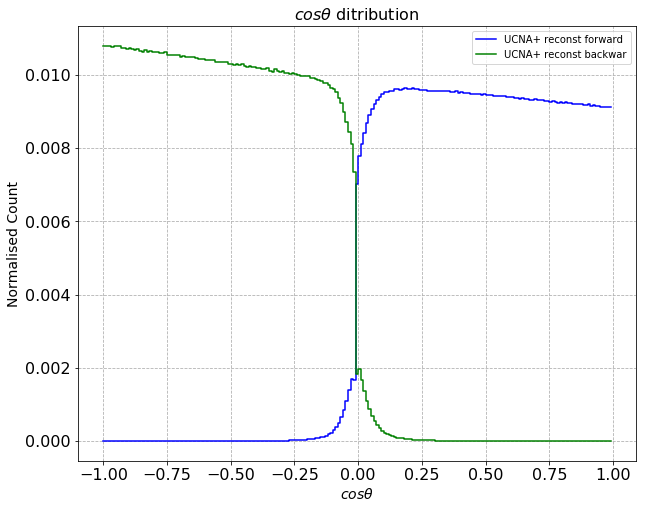

In [26]:
nEvents = 80000000
plt.figure(figsize=(10,8))
#plt.step(ucnaPAngleInfo_df["1"]["cosTh"], ucnaPAngleInfo_df["1"]["pz11;1"]/nEvents,c  = 'red',label = 'UCNA+ hits det1')
#plt.step(ucnaPAngleInfo_df["1"]["cosTh"], ucnaPAngleInfo_df["1"]["pz12;1"]/nEvents,c  = 'orange',label = 'UCNA+ hits det2')
plt.step(ucnaPAngleInfo_df["1"]["cosTh"], ucnaPAngleInfo_df["1"]["pz01;1"]/nEvents, c='blue', label = 'UCNA+ reconst forward')
plt.step(ucnaPAngleInfo_df["1"]["cosTh"], ucnaPAngleInfo_df["1"]["pz02;1"]/nEvents, c='green', label = 'UCNA+ reconst backwar')
#plt.step(ucnaPAngleInfo_df["1"]["cosTh"], ucnaPAngleInfo_df["1"]["pzE;1"]/nEvents,c  = 'red',label = 'cos theta distribution')

#plt.yscale('log')
#plt.yticks(fontsize = 16)
#plt.ylim(0.0, 0.0055)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.grid(linestyle = '--')
plt.legend()
plt.xlabel(r'$cos \theta$', fontsize = 14)
plt.ylabel('Normalised Count', fontsize = 14)
plt.title(r"$cos \theta$ ditribution ", fontsize = 16)
#plt.savefig(f'./mar/checking-eventgenchangeddd/cosTh.png')

# defining asym, asymB, b, corrected Events

In [7]:
def beta (KE): # beta = p_E / Ee = np.sqrt((KE)^2 + 2*m_e*KE) / (m_e + KE)
    m_e = 511; 
    beta = np.sqrt((KE*KE) + (2*m_e*KE)) / (m_e + KE)
    return beta

In [8]:
beta(110)

0.5682349680507384

In [9]:
def asymm_meas(df, col1, col2, col,errCol):
    df[col] = (df[col1] - df[col2])/(df[col1] + df[col2])
    df[errCol] = df[col]*np.sqrt((1/df[col1]) + (1/df[col2])) 
    
    return df

In [10]:
def asymm_meas_withBetaCorr(df, col1, col2, col,errCol):
    df['EMid'] = (df['Evals'] + df['Evals'].shift(-1)) / 2
   # Set the first index of the new column to 0
    df['EMidNew'] = df['EMid'].shift(1)
    df.at[df.index[0], 'EMidNew'] = 0
     
    df['beta'] = beta(df['EMidNew'])
    
    df[col] = (df[col1] - df[col2])/(((df[col1] + df[col2])*(df['beta']/2)))
    df[errCol] = df[col]*np.sqrt((1/df[col1]) + (1/df[col2])) 
    
    return df

Let's correct the counting for detector1 ,
<br>
$N_1 = N_01 -N_{mis01} + N_{mis02}$

In [11]:
def newRate(df):
    df['correcteN01'] = df['EdepType01;1'] -df['misEdepType01;1']+df['misEdepType02;1'] 
    df['correcteN02'] = df['EdepType02;1'] -df['misEdepType02;1']+df['misEdepType01;1'] 
  #  df['correcteN11'] = df['EdepType11;1'] -df['misEdepType11;1']+df['misEdepType12;1'] 
  #  df['correcteN12'] = df['EdepType12;1'] -df['misEdepType12;1']+df['misEdepType11;1'] 
    return df

# returning df with asyms

## A_meas

In [12]:
#cols =  ['KE;1', 'eTrue1;1', 'eTrue2;1', 'direct01;1','direct11;1','direct02;1','direct12;1','direct01Thr;1','direct11Thr;1','direct02Thr;1','direct12Thr;1',]

for key in ucnaP_df.keys():
   ucnap_item = newRate(df = ucnaP_df[key])
   ucnap_item = asymm_meas(df = ucnaP_df[key], col1='eTrue1;1'       , col2 = 'eTrue2;1'       ,   col = 'a_true0',      errCol='erra_true0')  
   ucnap_item = asymm_meas(df = ucnaP_df[key], col1='direct01;1'     , col2 = 'direct02;1'     ,   col = 'a_direct0',    errCol='erra_direct0')
   ucnap_item = asymm_meas(df = ucnaP_df[key], col1='EdepType01;1'   , col2 = 'EdepType02;1'   ,   col = 'a_type0',      errCol='erra_type0')  
   ucnap_item = asymm_meas(df = ucnaP_df[key], col1='correcteN01'    , col2 = 'correcteN02'    ,   col = 'a_CORRECTED0', errCol='erra_CORRECTED0')
   ucnap_item = asymm_meas(df = ucnaP_df[key], col1='misEdepType01;1', col2 = 'misEdepType02;1',   col = 'a_misid0',     errCol='erra_misid0') 

  # ucnap_item = asymm_meas(df = ucnaP_df[key], col1='direct11;1'     , col2 = 'direct12;1'   ,   col = 'a_direct1',    errCol='erra_direct1')
  # ucnap_item = asymm_meas(df = ucnaP_df[key], col1='EdepType11;1'   , col2 = 'EdepType12;1'   , col = 'a_type1',      errCol='erra_type1')  
  # ucnap_item = asymm_meas(df = ucnaP_df[key], col1='correcteN11'     , col2 = 'correcteN12',      col = 'a_CORRECTED1', errCol='erra_CORRECTED1')
  # ucnap_item = asymm_meas(df = ucnaP_df[key], col1='misEdepType11;1', col2 = 'misEdepType12;1', col = 'a_misid1',     errCol='erra_misid1') 


## A_meas/b

In [13]:
#cols =  ['KE;1', 'eTrue1;1', 'eTrue2;1', 'direct01;1','direct11;1','direct02;1','direct12;1','direct01Thr;1','direct11Thr;1','direct02Thr;1','direct12Thr;1',]

for key in ucnaP_df.keys():
   ucnap_item = newRate(df = ucnaP_df[key])
   ucnap_item = asymm_meas_withBetaCorr(df = ucnaP_df[key], col1='eTrue1;1'       , col2 = 'eTrue2;1'     ,   col = 'a_true0_beta',      errCol='erra_true0_beta')  
   ucnap_item = asymm_meas_withBetaCorr(df = ucnaP_df[key], col1='direct01;1'     , col2 = 'direct02;1'   ,   col = 'a_direct0_beta',    errCol='erra_direct0_beta')
   ucnap_item = asymm_meas_withBetaCorr(df = ucnaP_df[key], col1='EdepType01;1'   , col2 = 'EdepType02;1'   , col = 'a_type0_beta',      errCol='erra_type0_beta')  
   ucnap_item = asymm_meas_withBetaCorr(df = ucnaP_df[key], col1='correcteN01'    , col2 = 'correcteN02',     col = 'a_CORRECTED0_beta', errCol='erra_CORRECTED0_beta')
   ucnap_item = asymm_meas_withBetaCorr(df = ucnaP_df[key], col1='misEdepType01;1', col2 = 'misEdepType02;1', col = 'a_misid0_beta',     errCol='erra_misid0_beta') 

  # ucnap_item = asymm_meas_withBetaCorr(df = ucnaP_df[key], col1='direct11;1'     , col2 = 'direct12;1'   ,   col = 'a_direct1_beta',    errCol='erra_direct1_beta')
  # ucnap_item = asymm_meas_withBetaCorr(df = ucnaP_df[key], col1='EdepType11;1'   , col2 = 'EdepType12;1'   , col = 'a_type1_beta',      errCol='erra_type1_beta')  
  # ucnap_item = asymm_meas_withBetaCorr(df = ucnaP_df[key], col1='correcteN11'    , col2 = 'correcteN12',     col = 'a_CORRECTED1_beta', errCol='erra_CORRECTED1_beta')
  # ucnap_item = asymm_meas_withBetaCorr(df = ucnaP_df[key], col1='misEdepType11;1', col2 = 'misEdepType12;1', col = 'a_misid1_beta',     errCol='erra_misid1_beta') 


# Fitting function

In [33]:
# Define your linear function
def linear_function(x, m, b):
    return m * x + b

data_types   = ['a_true0_beta','a_direct0_beta','a_type0_beta','a_CORRECTED0_beta','a_misid0_beta']
#data_types   = ['a_true0','a_direct0','a_type0','a_CORRECTED0','a_misid0']

# Define your data types
data_colors = ['skyblue', 'salmon', 'limegreen', 'chocolate', 'yellowgreen']#,'orange', 'springgreen' ,'skyblue', 'salmon']#, 'limegreen', 'chocolate', 'yellowgreen','orange', 'springgreen' ]  # Define colors for each data type
plot_colors = ['blue', 'red', 'green', 'red', 'green']#, 'red', 'green','blue','red',]# 'green','red', 'green','red', 'green',] # Define colors for each data type

data_ylims = [-0.2,-0.2,-0.3,-0.2,-0.2, -0.2, -0.2, -0.2,-0.2,]#-0.2,-0.3,-0.2,-0.2, -0.3, -0.6, -0.5]  # Define y-limits for each data type
#data_ylims = [-0.1,-0.1,-0.1,-0.1,-0.05, -0.1, -0.1, -0.1,-0.1,]#-0.2,-0.3,-0.2,-0.2, -0.3, -0.6, -0.5]  # Define y-limits for each data type

# Your list of energies
E_list = [50,100,120, 150,180, 220, 260, 300]#]# 

# Dictionary to store fitted parameters for each data type
parameters_dict = {data_type: {'a_values': [], 'm_values': []} for data_type in data_types}

# Iterate over each data type
for data_index, data_type in enumerate(data_types):
    # Iterate over each key in ucnaP_df
    for key in ucnaP_df.keys():
        # Temporary lists to store fitted parameters for the current key and data type
        a_values = []
        m_values = []
        # Iterate over each energy in E_list
        for Ewin in E_list:  
            fitting_range = (Ewin, 660)  # 
            x_data = ucnaP_df[key]['Evals']
            y_data = ucnaP_df[key][data_type]  # Use the current data type
           # print(fitting_range[0])
           # print(fitting_range[1])
            # Filter the data
            mask = (x_data >= fitting_range[0]) & (x_data <= fitting_range[1]) & (~np.isnan(y_data))
            x_data_filtered = x_data[mask]
            y_data_filtered = y_data[mask]
       
            # Perform curve fitting
            params, covariance = curve_fit(linear_function, x_data_filtered, y_data_filtered)
            fitted_m = params[0]
            fitted_b = params[1]
            
            # Append fitted parameters to temporary lists
            a_values.append(fitted_b)
            m_values.append(fitted_m)
    
            # Plotting
            plt.figure(figsize=(12, 10))
            plt.scatter(x_data, ucnaP_df[key][data_type], color = plot_colors[data_index])
        #  plt.errorbar(x_data, y_data, alpha=0.8, yerr=ucnaP_df[key]['del'], color=data_colors[data_index], fmt='o', label=f'{data_type} events')
            plt.plot(x_data_filtered, linear_function(x_data_filtered, *params), label='UCNA+ - fit', color=plot_colors[data_index], zorder=10)
            plt.xlabel("Energy (keV)", fontsize=16)
          #  plt.ylabel(r"$A_{meas} = \frac{\Gamma_1 - \Gamma_2}{\Gamma_1 + \Gamma_2}} $", fontsize=16)
            plt.ylabel(r"$A_{meas} = \frac{\frac{\Gamma_1 - \Gamma_2}{\Gamma_1 + \Gamma_2}}{\beta /2} $", fontsize=16)
           
            plt.ylim(data_ylims[data_index], 0.00)  # Use different ylim for each data type
            plt.yticks(fontsize=16)
            plt.xlim(0, 800)
            plt.xticks(np.arange(0, 800, 25), fontsize=14, rotation=45)
            plt.grid(linestyle='--')
            plt.legend(fontsize=16)
            plt.title(f"Asymmetry {data_type} E_thr > 10 [{Ewin}, 660] keV", fontsize=16)
            plt.text(0.5, 0.55, f"Fitted A: {fitted_b:.4f}, Fitted m: {fitted_m:.6f}", transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5), fontsize=16)
            plt.savefig(f'./apr/energy-costh-deadevents-apr09/plot-asymmetry-may-foilposchanged-asym-different_{data_type}{str(Ewin)}660_fivekev.png')
            plt.close()  # Close the plot to avoid displaying it
        
        # Append the temporary lists of fitted parameters to the dictionary
        parameters_dict[data_type]['a_values'].append(a_values)
        parameters_dict[data_type]['m_values'].append(m_values)

# Now parameters_dict contains fitted b and m values for each data type separately


{'a_values': [[-0.031291670313672325,
   -0.034025290476926935,
   -0.03496055791517998,
   -0.03581747433034979,
   -0.0368716356926196,
   -0.03801294741075292,
   -0.039225500500271064,
   -0.040191245671426935]],
 'm_values': [[-3.901027564516289e-05,
   -3.314606838040774e-05,
   -3.1189635475874595e-05,
   -2.9429136114773992e-05,
   -2.730357596178196e-05,
   -2.5057782329157915e-05,
   -2.2734266251003083e-05,
   -2.0931383061696648e-05]]}

In [34]:
['a_true0_beta','a_direct0_beta','a_type0_beta','a_CORRECTED0_beta','a_misid0_beta']
xTrue_beta = parameters_dict['a_true0_beta']['a_values'][0]
x0_beta = parameters_dict['a_type0_beta']['a_values'][0]
#x1_beta = parameters_dict['a_type1_beta']['a_values'][0]
x0_direct_beta = parameters_dict['a_direct0_beta']['a_values'][0]
#x1_direct_beta = parameters_dict['a_type1_direct_beta']['a_values'][0]
x0_mis_beta = parameters_dict['a_misid0_beta']['a_values'][0]
#x1_mis_beta = parameters_dict['a_type1mis_beta']['a_values'][0]
x0_corrected_beta = parameters_dict['a_CORRECTED0_beta']['a_values'][0]

In [20]:
xTrue = parameters_dict['a_true0']['a_values'][0]
x0 = parameters_dict['a_type0']['a_values'][0]
#x1_beta = parameters_dict['a_type1_beta']['a_values'][0]
x0_direct = parameters_dict['a_direct0']['a_values'][0]
#x1_direct_beta = parameters_dict['a_type1_direct_beta']['a_values'][0]
x0_mis = parameters_dict['a_misid0']['a_values'][0]
#x1_mis_beta = parameters_dict['a_type1mis_beta']['a_values'][0]
x0_corrected = parameters_dict['a_CORRECTED0']['a_values'][0]

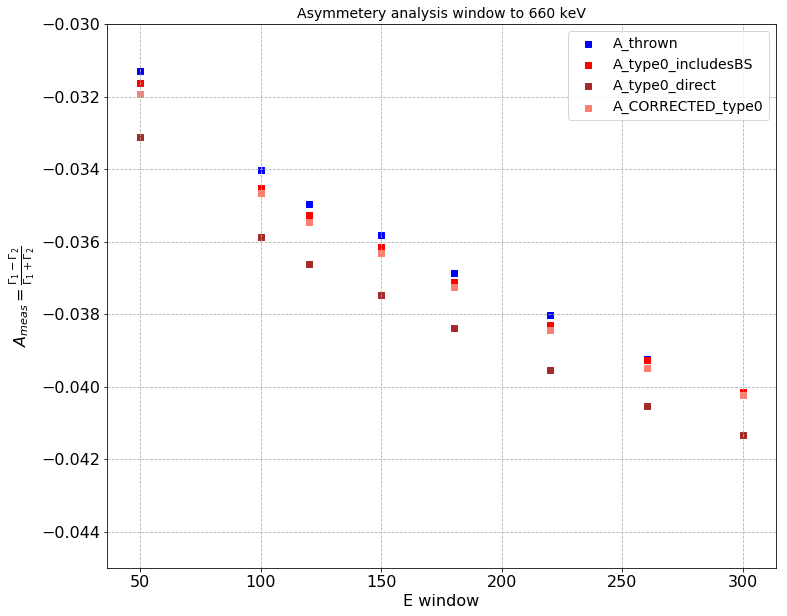

In [26]:
plt.figure(figsize=(12, 10))

plt.scatter(x= E_list, y = xTrue,marker = 's', color='blue',label = 'A_thrown')

plt.scatter(x= E_list, y = x0,marker = 's', color='red',label = 'A_type0_includesBS')
#plt.scatter(x= E_list, y = x1, marker = '^',color='green',label = 'A_type1_includesBS')

plt.scatter(x= E_list, y = x0_direct,marker = 's', color='brown',label = 'A_type0_direct')
#plt.scatter(x= E_list, y = x1_direct,marker = 'v', color='darkgreen',label = 'A_type1_direct')

#lt.scatter(x= E_list, y = x0_mis,marker = 's', color='green',label = 'A_type0_mis')
#plt.scatter(x= E_list, y = x1_mis,marker = '^', color='yellowgreen',label = 'A_Type1_mis')

plt.scatter(x= E_list, y = x0_corrected,marker = 's', color='salmon',label = 'A_CORRECTED_type0')
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylim(-0.045, -0.03)

#plt.ylabel(r"$\frac{A_{meas}}{\frac{\beta}{2}}$", fontsize=16)
plt.ylabel(r"$A_{meas}= \frac{\Gamma_1 - \Gamma_2}{\Gamma_1 + \Gamma_2}$", fontsize=16)

plt.xlabel('E window', fontsize = 16)
plt.title(f'Asymmetery analysis window to 660 keV', fontsize = 14)
plt.savefig(f'./apr/energy-costh-deadevents-apr09/plot-asymmetry-may-foilposchanged-asym-different/all-asym-delta/A_meas_diff_window.eps')

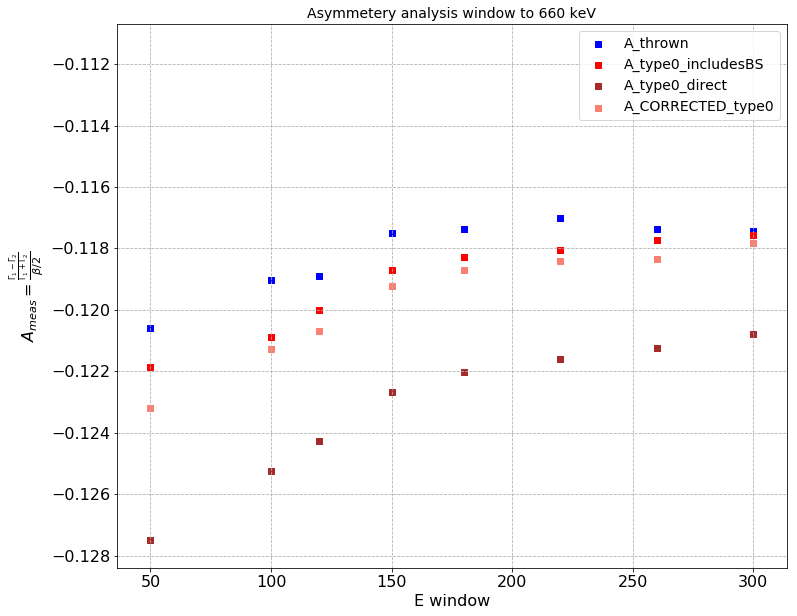

In [37]:
plt.figure(figsize=(12, 10))

plt.scatter(x= E_list, y = xTrue_beta,marker = 's', color='blue',label = 'A_thrown')

plt.scatter(x= E_list, y = x0_beta,marker = 's', color='red',label = 'A_type0_includesBS')
#plt.scatter(x= E_list, y = x1, marker = '^',color='green',label = 'A_type1_includesBS')

plt.scatter(x= E_list, y = x0_direct_beta,marker = 's', color='brown',label = 'A_type0_direct')
#plt.scatter(x= E_list, y = x1_direct,marker = 'v', color='darkgreen',label = 'A_type1_direct')

#plt.scatter(x= E_list, y = x0_mis_beta,marker = 's', color='green',label = 'A_type0_mis')
#plt.scatter(x= E_list, y = x1_mis,marker = '^', color='yellowgreen',label = 'A_Type1_mis')

plt.scatter(x= E_list, y = x0_corrected_beta,marker = 's', color='salmon',label = 'A_CORRECTED_type0')
x0_corrected_beta
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

#plt.ylabel(r"$\frac{A_{meas}}{\frac{\beta}{2}}$", fontsize=16)
plt.ylabel(r"$A_{meas} =\frac{ \frac{\Gamma_1 - \Gamma_2}{\Gamma_1 + \Gamma_2}}{\beta/2}$", fontsize=16)

plt.xlabel('E window', fontsize = 16)
plt.title(f'Asymmetery analysis window to 660 keV', fontsize = 14)
plt.savefig(f'./apr/energy-costh-deadevents-apr09/plot-asymmetry-may-foilposchanged-asym-different/all-asym-delta/A_beta_diff_window.png')
plt.savefig(f'./apr/energy-costh-deadevents-apr09/plot-asymmetry-may-foilposchanged-asym-different/all-asym-delta/A_beta_diff_window.eps')

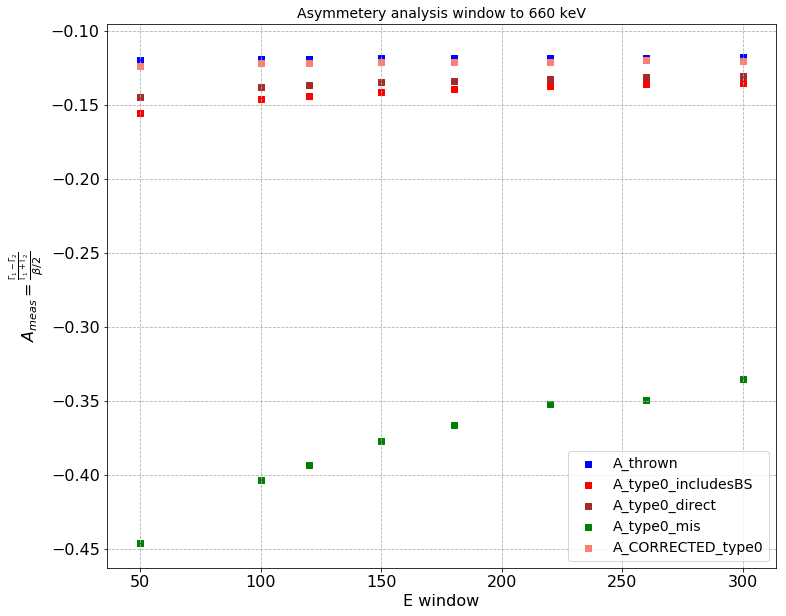

In [18]:
plt.figure(figsize=(12, 10))

plt.scatter(x= E_list, y = xTrue_beta,marker = 's', color='blue',label = 'A_thrown')

plt.scatter(x= E_list, y = x0_beta,marker = 's', color='red',label = 'A_type0_includesBS')
#plt.scatter(x= E_list, y = x1, marker = '^',color='green',label = 'A_type1_includesBS')

plt.scatter(x= E_list, y = x0_direct_beta,marker = 's', color='brown',label = 'A_type0_direct')
#plt.scatter(x= E_list, y = x1_direct,marker = 'v', color='darkgreen',label = 'A_type1_direct')

plt.scatter(x= E_list, y = x0_mis_beta,marker = 's', color='green',label = 'A_type0_mis')
#plt.scatter(x= E_list, y = x1_mis,marker = '^', color='yellowgreen',label = 'A_Type1_mis')

plt.scatter(x= E_list, y = x0_corrected_beta,marker = 's', color='salmon',label = 'A_CORRECTED_type0')
x0_corrected_beta
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

#plt.ylabel(r"$\frac{A_{meas}}{\frac{\beta}{2}}$", fontsize=16)
plt.ylabel(r"$A_{meas} =\frac{ \frac{\Gamma_1 - \Gamma_2}{\Gamma_1 + \Gamma_2}}{\beta/2}$", fontsize=16)

plt.xlabel('E window', fontsize = 16)
plt.title(f'Asymmetery analysis window to 660 keV', fontsize = 14)
#plt.savefig(f'./apr/asymmetries_type0_EVERYTHIMG_wBeta_1kev_binwidth.png')


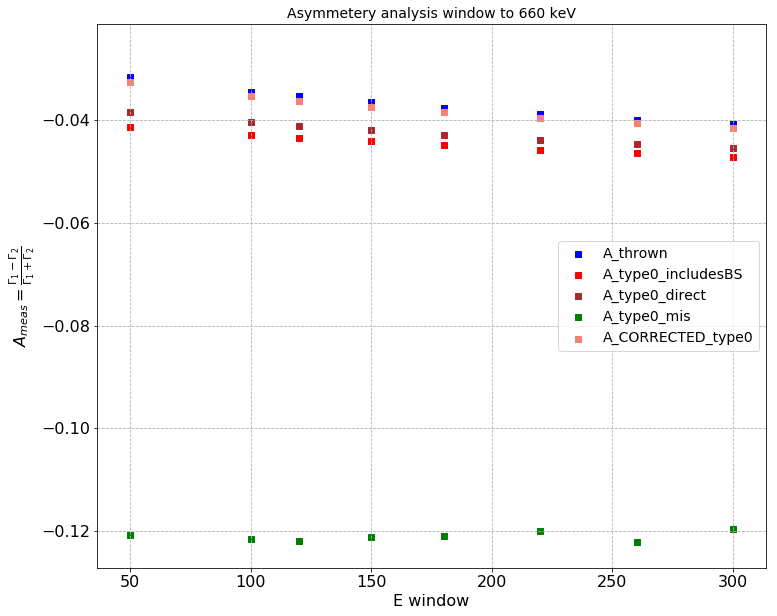

In [24]:
plt.figure(figsize=(12, 10))

plt.scatter(x= E_list, y = xTrue,marker = 's', color='blue',label = 'A_thrown')

plt.scatter(x= E_list, y = x0,marker = 's', color='red',label = 'A_type0_includesBS')
#plt.scatter(x= E_list, y = x1, marker = '^',color='green',label = 'A_type1_includesBS')

plt.scatter(x= E_list, y = x0_direct,marker = 's', color='brown',label = 'A_type0_direct')
#plt.scatter(x= E_list, y = x1_direct,marker = 'v', color='darkgreen',label = 'A_type1_direct')

plt.scatter(x= E_list, y = x0_mis,marker = 's', color='green',label = 'A_type0_mis')
#plt.scatter(x= E_list, y = x1_mis,marker = '^', color='yellowgreen',label = 'A_Type1_mis')

plt.scatter(x= E_list, y = x0_corrected,marker = 's', color='salmon',label = 'A_CORRECTED_type0')
plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

#plt.ylabel(r"$\frac{A_{meas}}{\frac{\beta}{2}}$", fontsize=16)
plt.ylabel(r"$A_{meas}= \frac{\Gamma_1 - \Gamma_2}{\Gamma_1 + \Gamma_2}$", fontsize=16)

plt.xlabel('E window', fontsize = 16)
plt.title(f'Asymmetery analysis window to 660 keV', fontsize = 14)
#plt.savefig(f'./apr/asymmetries_type0_EVERYTHIMG_noBeta_1kev_binwidth.png')


In [ ]:
E_list = [50,100, 120,150,]#180,220,260,300]

nWindow = len(E_list)

aType0and1 = {}
aType0and1_direct = {}
aType0and1_mis = {}
correction_w_miscatter= {}
correction_no_miscatter= {}

aType0and1_beta = {}
aType0and1_direct_beta = {}
aType0and1_mis_beta = {}
correction_w_miscatter_beta= {}
correction_no_miscatter_beta= {}


for i, key in enumerate(ucnaP_df.keys()):
    
    aType0and1[key] = []
    aType0and1_mis[key] = []
    correction_w_miscatter[key] = []
    aType0and1_direct[key] = []
    aType0and1_beta[key] = []
    aType0and1_mis_beta[key] = []
    aType0and1_direct_beta[key] = []
    correction_w_miscatter_beta[key]= []
    correction_no_miscatter[key] = []
    correction_no_miscatter_beta[key] = []
    print(f"======= {key}0 keV cutoff =======")
    for j in np.arange(len(E_list)):
        #print(x0[j])
        print(f'{j} analysis window ')
        #print(f'element number {nWindow*i + j}')
        a_typei, a_direct, a_misid, delta_w_miscatter, delta_no_miscatter  = aTot(ucnaP_df[key], NTot = nTot[j], a0 = x0[j], a1= x1[j],a_true= xTrue[j],a0_direct = x0_direct[j], a1_direct=x1_direct[j], a0_misid = x0_mis[j],a1_misid = x1_mis[j],Ewin=E_list[j])

      #  a_typei_wbeta, a_direct_wbeta, a_misid_wbeta, delta_w_miscatter_wbeta, delta_no_miscatter_wbeta = aTot(ucnaP_df[key], NTot = nTot[j], a0 = x0_beta[j], a1= x1_beta[j],a_true= xTrue_beta[j],a0_direct = x0_direct_beta[j], a1_direct=x1_direct_beta[j], a0_misid = x0_mis_beta[j],a1_misid = x1_mis_beta[j],Ewin=E_list[j])
        
        aType0and1[key].append(a_typei)
        aType0and1_direct[key].append(a_direct)
        aType0and1_mis[key].append(a_misid)
        correction_w_miscatter[key].append(delta_w_miscatter)
        correction_no_miscatter[key].append(delta_no_miscatter)
        
     #   aType0and1_beta[key].append(a_typei_wbeta)
     #   aType0and1_mis_beta[key].append(a_misid_wbeta)
     #   aType0and1_direct_beta[key].append(a_direct_wbeta)
     #   correction_w_miscatter_beta[key].append(delta_w_miscatter_wbeta)
     #   correction_no_miscatter_beta[key].append(delta_no_miscatter_wbeta)
        
     #   print(f'aCorrEvs : {a_corrEvts}, aMisid :{aMisid}, A_mc : {aMC}, correction : {delta}')
        print('------------------------------------------')
        


# Spectra

In [14]:
nEvents = 80000000

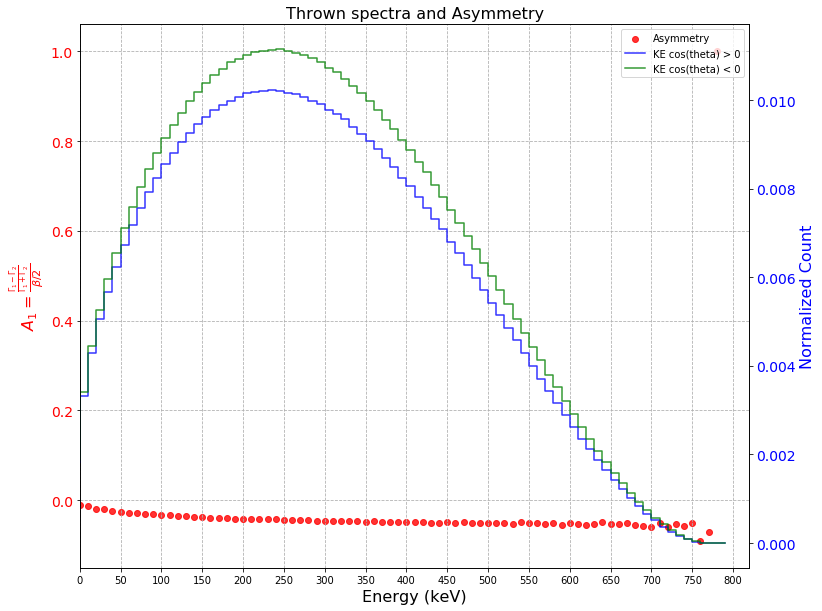

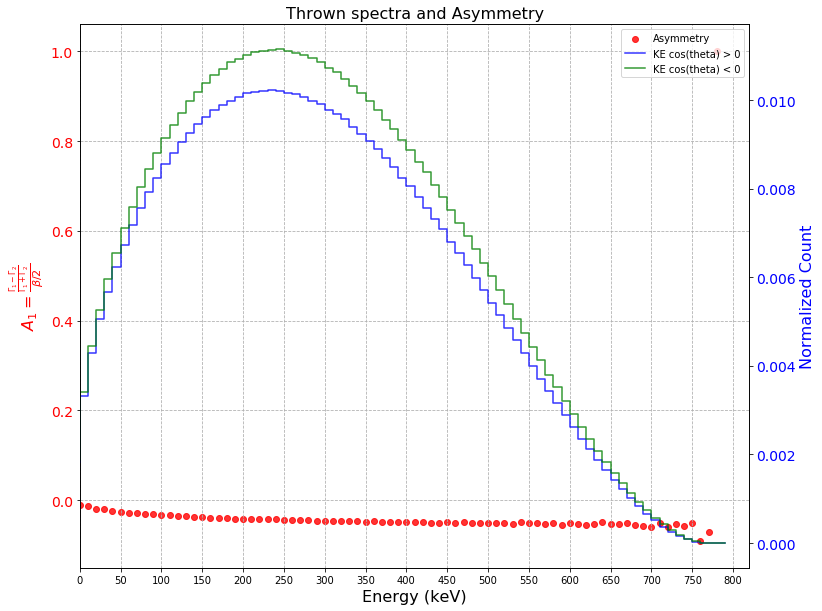

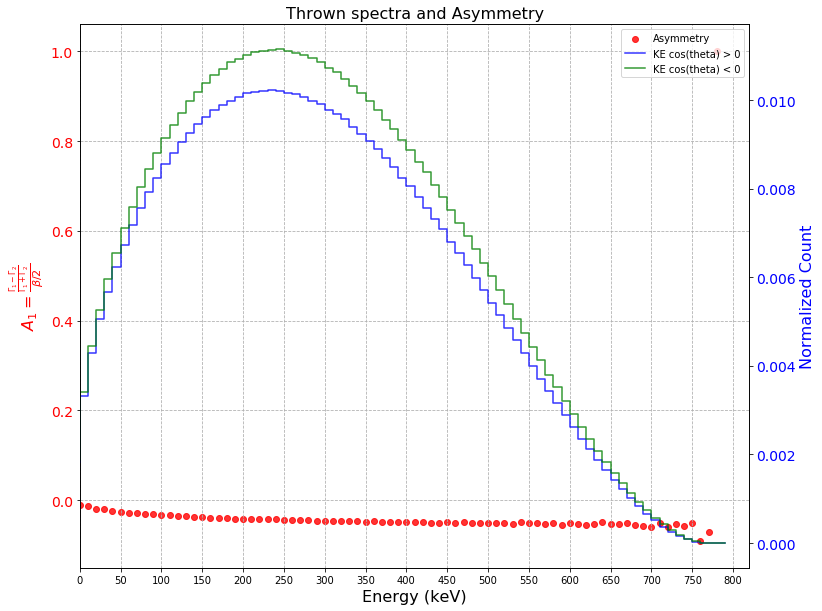

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Loop over keys in ucnaP_df
for key in ucnaP_df.keys():
    ucnap_item = ucnaP_df[key]

    # Create a new figure
    fig, ax1 = plt.subplots(figsize=(12, 10))
    color2 = 'red'
    ax1.scatter(ucnap_item["Evals"], ucnap_item["a_true0"], color=color2, alpha=0.8, label='Asymmetry')

   # ax1.set_ylabel(r"$A_{meas} = \frac{\Gamma_1 - \Gamma_2}{\Gamma_1 + \Gamma_2}$", color=color2, fontsize=16)
    ax1.set_ylabel(r"$A_{1} = \frac{\frac{\Gamma_1 - \Gamma_2}{\Gamma_1 + \Gamma_2}}{\beta/2}$", color=color2, fontsize=16)
    
    ax1.tick_params(axis='y', labelcolor=color2, labelsize=14)

    # Plot the first set of data with the left y-axis
    ax2 = ax1.twinx()
    
    color1 = 'blue'
    ax2.step(ucnap_item["Evals"], ucnap_item["eTrue1;1"] / nEvents, color=color1, alpha=0.8, label='KE cos(theta) > 0')
    ax2.step(ucnap_item["Evals"], ucnap_item["eTrue2;1"] / nEvents, color='green', alpha=0.8, label='KE cos(theta) < 0')

    ax2.set_ylabel("Normalized Count", color=color1, fontsize=16)
    ax2.tick_params(axis='y', labelcolor=color1, labelsize=14)
    ax2.tick_params(axis='x', labelsize=14)

    # Create a secondary y-axis for the asymmetry data
   
    # Set limits and ticks for both y-axes
    #ax1.set_ylim(-0.2, -0.05)
    #ax1.set_yticks(np.arange(-0.2, -0.05, 0.02))
    #ax2.set_ylim(0.0, 0.006)
    #ax2.set_yticks(np.arange(0, 0.006, 0.0005))

    ax1.set_xlim(0, 820)
    ax1.set_xticks(np.arange(0, 820, 50) )

    ax1.set_xlabel("Energy (keV)", fontsize=16)
    ax1.grid(linestyle='--')

    # Add legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    plt.title('Thrown spectra and Asymmetry', fontsize = 16)
    # Show the plot
   # plt.savefig('./apr/10kev_thrown_spectra_asymmetries.png')
    #plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Loop over keys in ucnaP_df
for key in ucnaP_df.keys():
    ucnap_item = ucnaP_df[key]

    # Create a new figure
    fig, ax1 = plt.subplots(figsize=(12, 10))
    color2 = 'red'
   # ax1.scatter(ucnap_item["Evals"], ucnap_item["a_type0"], color=color2, alpha=0.8, label='Asymmetry')
    ax1.scatter(ucnap_item["Evals"], ucnap_item["a_type1"], color=color2, alpha=0.8, label='Asymmetry')
   # 
   # ax1.scatter(ucnap_item["Evals"], ucnap_item["a_type0_beta"], color=color2, alpha=0.8, label='Type 0')
   # ax1.scatter(ucnap_item["Evals"], ucnap_item["a_direct0_beta"], color='olivedrab', alpha=0.8, label='Direct Type 0')
   # ax1.scatter(ucnap_item["Evals"], ucnap_item["a_CORRECTED0_beta"], color='darkorchid', alpha=0.8, label='Corrected Type 0')
    
    ax1.set_ylabel(r"$A_{meas} = \frac{\Gamma_1 - \Gamma_2}{\Gamma_1 + \Gamma_2}}$", color=color2, fontsize=16)
    
    #ax1.set_ylabel(r"$A_{1} = \frac{\frac{\Gamma_1 - \Gamma_2}{\Gamma_1 + \Gamma_2}}{\beta/2}$", color=color2, fontsize=16)
    ax1.tick_params(axis='y', labelcolor=color2, labelsize=14)

    # Plot the first set of data with the left y-axis
    ax2 = ax1.twinx()
    
    color1 = 'blue'
   # ax2.step(ucnap_item["Evals"], ucnap_item["EdepType01;1"] / nEvents, color=color1,       alpha=0.8, label='E1 only')
   # ax2.step(ucnap_item["Evals"], ucnap_item["EdepType02;1"] / nEvents, color='green',      alpha=0.8, label='E2 only')
    ax2.step(ucnap_item["Evals"], ucnap_item["EdepType11;1"] / nEvents, color=color1,       alpha=0.8, label='E1 only')
    ax2.step(ucnap_item["Evals"], ucnap_item["EdepType12;1"] / nEvents, color='green',      alpha=0.8, label='E2 only')
   
    #ax2.step(ucnap_item["Evals"], ucnap_item["direct01;1"] / nEvents,   color='salmon',     alpha=0.8, label=r'$cos\theta > 0$ E1 only')
    #ax2.step(ucnap_item["Evals"], ucnap_item["direct02;1"] / nEvents,   color='goldenrod',  alpha=0.8, label=r'$cos\theta < 0$ E2 only')
   # ax2.step(ucnap_item["Evals"], ucnap_item["correcteN01"] / nEvents, color='orange',  alpha=0.8, label='corrected E1')
   # ax2.step(ucnap_item["Evals"], ucnap_item["correcteN02"] / nEvents, color='brown',alpha=0.8, label='corrected E2')

    #ax2.step(ucnap_item["Evals"], ucnap_item["misEdepType01;1"] / nEvents, color='purple', alpha=0.8, label=r'$cos\theta < 0$ E1 only')
    #ax2.step(ucnap_item["Evals"], ucnap_item["misEdepType02;1"] / nEvents, color='orange', alpha=0.8, label=r'$cos\theta > 0$ E2 only')
    ax2.step(ucnap_item["Evals"], ucnap_item["misEdepType11;1"] / nEvents, color='purple', alpha=0.8, label=r'$cos\theta < 0$ t1 < t2 -misbs')
    ax2.step(ucnap_item["Evals"], ucnap_item["misEdepType12;1"] / nEvents, color='orange', alpha=0.8, label=r'$cos\theta > 0$ t2 < t1 -misbs')

    ax2.set_xlabel("Energy (keV)", fontsize=16)
    ax2.set_ylabel("Normalized Count", color=color1, fontsize=16)
    ax2.tick_params(axis='y', labelcolor=color1, labelsize=14)
    ax2.tick_params(axis='x', labelsize=14)
#    ax1.set_ylim(-0.1, 0.01)
#    ax1.set_yticks(np.arange(-0.1, 0.01, 0.005))
#    ax2.set_ylim(0.0, 0.012)
#    ax2.set_yticks(np.arange(0, 0.0120, 0.002))

    # Create a secondary y-axis for the asymmetry data
   
    # Set limits and ticks for both y-axes
    #ax1.set_ylim(-0.35, -0.05)
    #ax1.set_yticks(np.arange(-0.35, -0.05, 0.05))

    ax1.set_ylim(-0.12, 0.02)
    ax1.set_yticks(np.arange(-0.12, 0.02, 0.01))
    ax2.set_ylim(0.0, 0.0002)
    ax2.set_yticks(np.arange(0, 0.00020, 0.00002))


    ax1.set_xlim(0, 800)
    ax1.set_xticks(np.arange(0, 800, 25))

    ax1.grid(linestyle='--')

    # Add legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='top right')
    plt.title(f'Raw Asymmetry from type 1 E_threshold = {key}0 keV', fontsize = 16)
    # Show the plot
    plt.savefig(f'./apr/10kev_type1_spectra_asymmetries_str{key}_threshold.png')
    #plt.show()

/home/rhythm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.3, top=-0.3
/home/rhythm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.3, top=-0.3
/home/rhythm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.3, top=-0.3


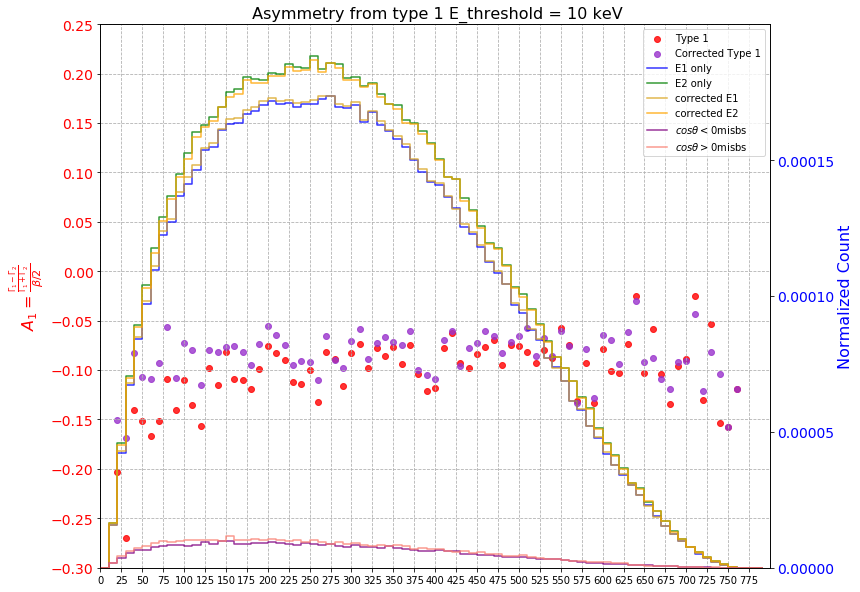

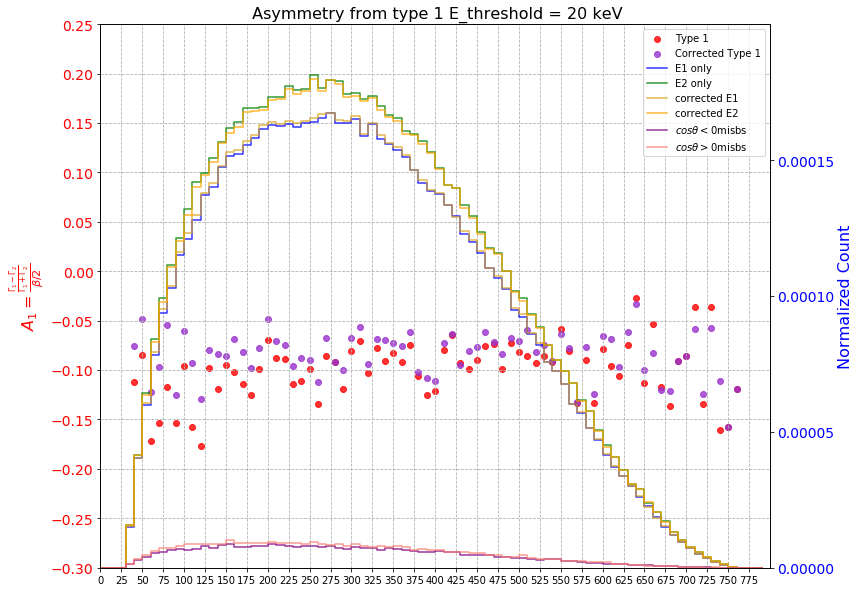

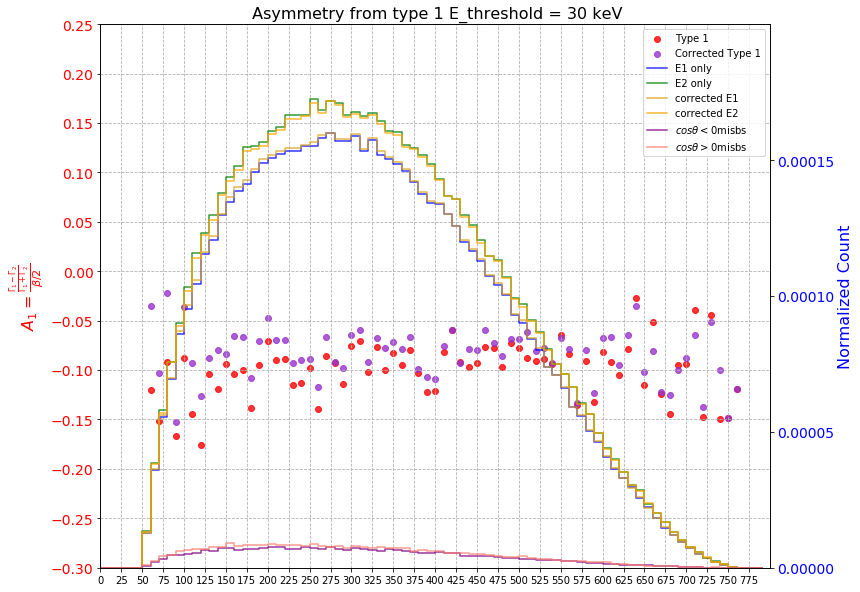

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Loop over keys in ucnaP_df
for key in ucnaP_df.keys():
    ucnap_item = ucnaP_df[key]

    # Create a new figure
    fig, ax1 = plt.subplots(figsize=(12, 10))
    color2 = 'red'
 #   ax1.scatter(ucnap_item["Evals"], ucnap_item["a_type0"], color=color2, alpha=0.8, label='Asymmetry')
    ax1.scatter(ucnap_item["Evals"], ucnap_item["a_type1_beta"], color=color2, alpha=0.8, label='Type 1')
   # ax1.scatter(ucnap_item["Evals"], ucnap_item["a_direct1_beta"], color='olivedrab', alpha=0.8, label='Direct Type 1')
    ax1.scatter(ucnap_item["Evals"], ucnap_item["a_CORRECTED1_beta"], color='darkorchid', alpha=0.8, label='Corrected Type 1')

   #ax1.scatter(ucnap_item["Evals"], ucnap_item["a_type0_beta"], color=color2, alpha=0.8, label='Type 0')
   # ax1.scatter(ucnap_item["Evals"], ucnap_item["a_direct0_beta"], color='olivedrab', alpha=0.8, label='Direct Type 0')
   # ax1.scatter(ucnap_item["Evals"], ucnap_item["a_CORRECTED0_beta"], color='gray', alpha=0.8, label='Corrected Type 0')

    ax1.set_ylabel(r"$A_{1} = \frac{\frac{\Gamma_1 - \Gamma_2}{\Gamma_1 + \Gamma_2}}{\beta/2}$", color=color2, fontsize=16)
    ax1.tick_params(axis='y', labelcolor=color2, labelsize=14)

    # Plot the first set of data with the left y-axis
    ax2 = ax1.twinx()
    
    color1 = 'blue'
    ax2.step(ucnap_item["Evals"], ucnap_item["EdepType11;1"] / nEvents, color=color1,       alpha=0.8, label='E1 only')
    ax2.step(ucnap_item["Evals"], ucnap_item["EdepType12;1"] / nEvents, color='green',      alpha=0.8, label='E2 only')
   # ax2.step(ucnap_item["Evals"], ucnap_item["direct11;1"] / nEvents,   color='salmon',     alpha=0.8, label=r'$cos\theta > 0$ E1 only')
   # ax2.step(ucnap_item["Evals"], ucnap_item["direct12;1"] / nEvents,   color='goldenrod',  alpha=0.8, label=r'$cos\theta < 0$ E2 only')
    ax2.step(ucnap_item["Evals"], ucnap_item["correcteN11"] / nEvents, color='goldenrod',  alpha=0.8, label='corrected E1')
    ax2.step(ucnap_item["Evals"], ucnap_item["correcteN12"] / nEvents, color='orange',alpha=0.8, label='corrected E2')

    ax2.step(ucnap_item["Evals"], ucnap_item["misEdepType11;1"] / nEvents, color='purple', alpha=0.8, label=r'$cos\theta < 0$misbs')
    ax2.step(ucnap_item["Evals"], ucnap_item["misEdepType12;1"] / nEvents, color='salmon', alpha=0.8, label=r'$cos\theta > 0$misbs')
   
   # ax2.step(ucnap_item["Evals"], ucnap_item["EdepType01;1"] / nEvents, color=color1,       alpha=0.8, label='E1 only')
   # ax2.step(ucnap_item["Evals"], ucnap_item["EdepType02;1"] / nEvents, color='green',      alpha=0.8, label='E2 only')
   # ax2.step(ucnap_item["Evals"], ucnap_item["direct01;1"] / nEvents,   color='salmon',     alpha=0.8, label=r'$cos\theta > 0$ E1 only')
   # ax2.step(ucnap_item["Evals"], ucnap_item["direct02;1"] / nEvents,   color='goldenrod',  alpha=0.8, label=r'$cos\theta < 0$ E2 only')
    #ax2.step(ucnap_item["Evals"], ucnap_item["correcteN01"] / nEvents, color='goldenrod',  alpha=0.8, label='corrected E1')
    #ax2.step(ucnap_item["Evals"], ucnap_item["correcteN02"] / nEvents, color='orange',alpha=0.8, label='corrected E2')

  #  ax2.step(ucnap_item["Evals"], ucnap_item["misEdepType01;1"] / nEvents, color='purple', alpha=0.8, label=r'$cos\theta < 0$ E1 only')
  #  ax2.step(ucnap_item["Evals"], ucnap_item["misEdepType02;1"] / nEvents, color='salmon', alpha=0.8, label=r'$cos\theta > 0$ E2 only')

    ax2.set_xlabel("Energy (keV)", fontsize=16)
    ax2.set_ylabel("Normalized Count", color=color1, fontsize=16)
    ax2.tick_params(axis='y', labelcolor=color1, labelsize=14)
    ax2.tick_params(axis='x', labelsize=14)

    # Create a secondary y-axis for the asymmetry data
   
    # Set limits and ticks for both y-axes
    
    
    ax1.set_ylim(-0.3,-.3)
    ax1.set_yticks(np.arange(-0.3, 0.3, 0.05))
    ax2.set_ylim(0.0, 0.0002)
    ax2.set_yticks(np.arange(0, 0.0002, 0.00005))

    ax1.set_xlim(0, 800)
    ax1.set_xticks(np.arange(0, 800, 25))

    ax1.grid(linestyle='--')

    # Add legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    # Show the plot
    #plt.show()
    plt.title(f' Asymmetry from type 1 E_threshold = {key}0 keV', fontsize = 16)
    # Show the plot
    plt.savefig(f'./apr/10kev_type1_spectra_asymmetries_str{key}_threshold.png')
    #plt.show()

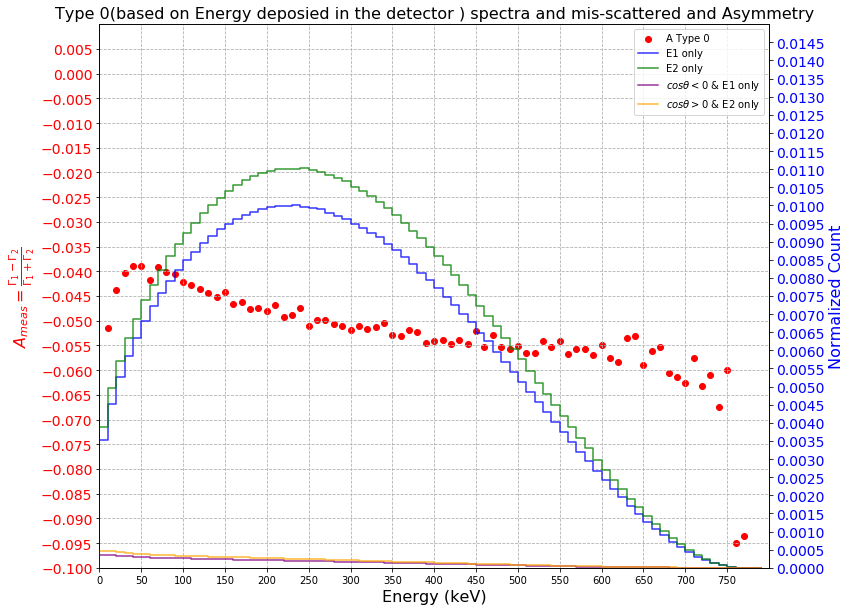

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Loop over keys in ucnaP_df
for key in ucnaP_df.keys():
    ucnap_item = ucnaP_df[key]

    # Create a new figure
    fig, ax1 = plt.subplots(figsize=(12, 10))
    color2 = 'red'
    ax1.scatter(ucnap_item["Evals"], ucnap_item["a_type0"], color=color2,  label='A Type 0')

    ax1.tick_params(axis='y', labelcolor=color2, labelsize=14)

    # Plot the first set of data with the left y-axis
    ax2 = ax1.twinx()
    
    color1 = 'blue'
    ax2.step(ucnap_item["Evals"], ucnap_item["EdepType01;1"] / nEvents, color=color1, alpha=0.8, label='E1 only')
    ax2.step(ucnap_item["Evals"], ucnap_item["EdepType02;1"] / nEvents, color='green', alpha=0.8, label='E2 only')
    ax2.step(ucnap_item["Evals"], ucnap_item["misEdepType01;1"] / nEvents, color='purple', alpha=0.8, label=r'$cos\theta < 0$ & E1 only')
    ax2.step(ucnap_item["Evals"], ucnap_item["misEdepType02;1"] / nEvents, color='orange', alpha=0.8, label=r'$cos\theta > 0$ & E2 only')

    ax1.set_xlabel("Energy (keV)", fontsize=16)
    ax2.set_ylabel("Normalized Count", color=color1, fontsize=16)
    ax2.tick_params(axis='y', labelcolor=color1, labelsize=14)
    ax2.tick_params(axis='x', labelsize=14)

    # Create a secondary y-axis for the asymmetry data
   
    # Set limits and ticks for both y-axes
    ax1.set_ylim(-0.1, 0.01)
    ax1.set_yticks(np.arange(-0.1, 0.01, 0.005))
    ax2.set_ylim(0.0, 0.015)
    ax2.set_yticks(np.arange(0, 0.015, 0.0005))

    ax1.set_ylabel(r"$A_{meas} = \frac{\Gamma_1 - \Gamma_2}{\Gamma_1 + \Gamma_2}$", color=color2, fontsize=16)
    ax1.set_xlim(0, 800)
    ax1.set_xticks(np.arange(0, 800, 50))

    ax1.grid(linestyle='--')

    # Add legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    plt.title('Type 0(based on Energy deposied in the detector ) spectra and mis-scattered and Asymmetry', fontsize = 16)
    # Show the plot
   # plt.savefig('./apr/10keV_type0_spectra_w_misid_asymmetries.png')
    #plt.show()

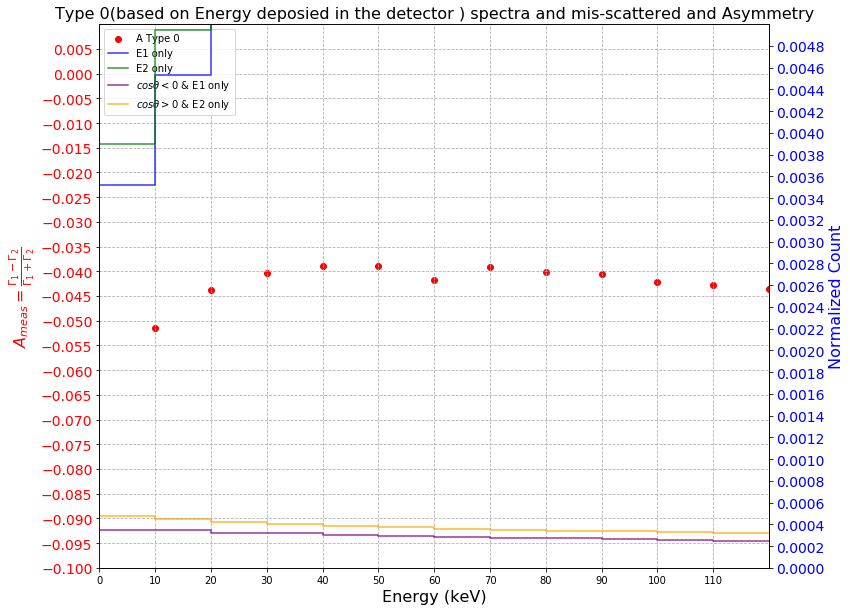

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Loop over keys in ucnaP_df
for key in ucnaP_df.keys():
    ucnap_item = ucnaP_df[key]

    # Create a new figure
    fig, ax1 = plt.subplots(figsize=(12, 10))
    color2 = 'red'
    ax1.scatter(ucnap_item["Evals"], ucnap_item["a_type0"], color=color2,  label='A Type 0')

    ax1.tick_params(axis='y', labelcolor=color2, labelsize=14)

    # Plot the first set of data with the left y-axis
    ax2 = ax1.twinx()
    
    color1 = 'blue'
    ax2.step(ucnap_item["Evals"], ucnap_item["EdepType01;1"] / nEvents, color=color1, alpha=0.8, label='E1 only')
    ax2.step(ucnap_item["Evals"], ucnap_item["EdepType02;1"] / nEvents, color='green', alpha=0.8, label='E2 only')
    ax2.step(ucnap_item["Evals"], ucnap_item["misEdepType01;1"] / nEvents, color='purple', alpha=0.8, label=r'$cos\theta < 0$ & E1 only')
    ax2.step(ucnap_item["Evals"], ucnap_item["misEdepType02;1"] / nEvents, color='orange', alpha=0.8, label=r'$cos\theta > 0$ & E2 only')

    ax1.set_xlabel("Energy (keV)", fontsize=16)
    ax2.set_ylabel("Normalized Count", color=color1, fontsize=16)
    ax2.tick_params(axis='y', labelcolor=color1, labelsize=14)
    ax2.tick_params(axis='x', labelsize=14)

    # Create a secondary y-axis for the asymmetry data
   
    # Set limits and ticks for both y-axes
    ax1.set_ylim(-0.1, 0.01)
    ax1.set_yticks(np.arange(-0.1, 0.01, 0.005))
    ax2.set_ylim(0.0, 0.005)
    ax2.set_yticks(np.arange(0, 0.0050, 0.0002))

    ax1.set_ylabel(r"$A_{meas} = \frac{\Gamma_1 - \Gamma_2}{\Gamma_1 + \Gamma_2}$", color=color2, fontsize=16)
    ax1.set_xlim(0, 120)
    ax1.set_xticks(np.arange(0, 120, 10))

    ax1.grid(linestyle='--')

    # Add legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    plt.title('Type 0(based on Energy deposied in the detector ) spectra and mis-scattered and Asymmetry', fontsize = 16)
    # Show the plot
    plt.savefig('./apr/10keVtype0_spectra_and_misid_zoomed_asymmetries.png')
    #plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Loop over keys in ucnaP_df
for key in ucnaP_df.keys():
    ucnap_item = ucnaP_df[key]

    # Create a new figure
    fig, ax1 = plt.subplots(figsize=(12, 10))
    color2 = 'red'
    ax1.scatter(ucnap_item["Evals"], ucnap_item["a_direct0"], color=color2,  label='A Type 0 from direct events only')

    ax1.tick_params(axis='y', labelcolor=color2, labelsize=14)

    # Plot the first set of data with the left y-axis
    ax2 = ax1.twinx()
    
    color1 = 'blue'
    ax2.step(ucnap_item["Evals"], ucnap_item["direct01;1"] / nEvents, color='blue', alpha=0.8, label=r'$cos\theta > 0$ & E1 only')
    ax2.step(ucnap_item["Evals"], ucnap_item["direct02;1"] / nEvents, color='green', alpha=0.8, label=r'$cos\theta < 0$ & E2 only')

    ax1.set_xlabel("Energy (keV)", fontsize=16)
    ax2.set_ylabel("Normalized Count", color=color1, fontsize=16)
    ax2.tick_params(axis='y', labelcolor=color1, labelsize=14)
    ax2.tick_params(axis='x', labelsize=14)

    # Create a secondary y-axis for the asymmetry data
   
    # Set limits and ticks for both y-axes
    ax1.set_ylim(-0.1, 0.01)
    ax1.set_yticks(np.arange(-0.1, 0.01, 0.005))
    ax2.set_ylim(0.0, 0.006)
    ax2.set_yticks(np.arange(0, 0.0060, 0.0002))

    ax1.set_ylabel(r"$A_{meas} = \frac{\Gamma_1 - \Gamma_2}{\Gamma_1 + \Gamma_2}$", color=color2, fontsize=16)
    ax1.set_xlim(0, 800)
    ax1.set_xticks(np.arange(0, 800, 50))

    ax1.grid(linestyle='--')

    # Add legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    plt.title('Type 0(based on Energy deposied in the detector & same directn) spectra and  and Asymmetry', fontsize = 16)
    # Show the plot
    #plt.savefig('./apr/type0_direct_spectra_asymmetries.png')
    #plt.show()

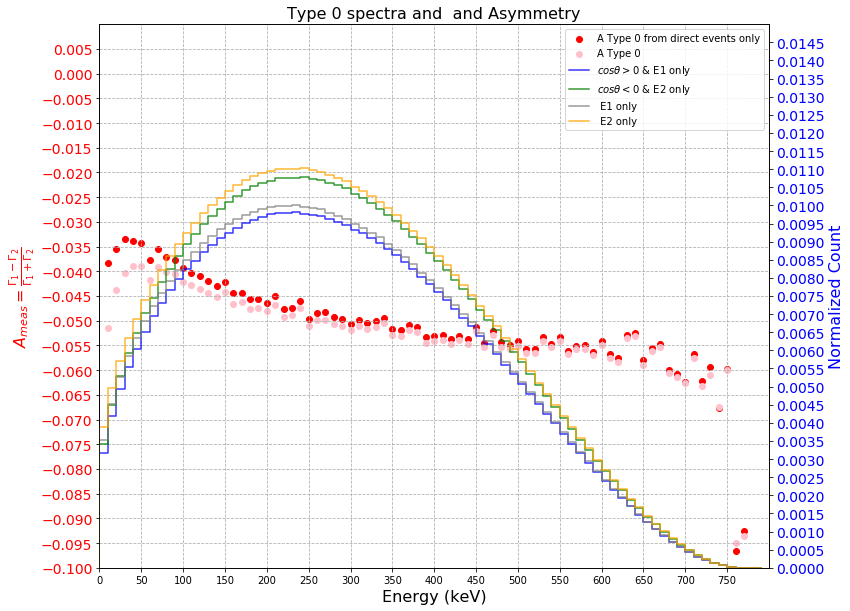

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Loop over keys in ucnaP_df
for key in ucnaP_df.keys():
    ucnap_item = ucnaP_df[key]

    # Create a new figure
    fig, ax1 = plt.subplots(figsize=(12, 10))
    color2 = 'red'
    ax1.scatter(ucnap_item["Evals"], ucnap_item["a_direct0"], color=color2,  label='A Type 0 from direct events only')
    ax1.scatter(ucnap_item["Evals"], ucnap_item["a_type0"], color='pink',  label='A Type 0')

    ax1.tick_params(axis='y', labelcolor=color2, labelsize=14)

    # Plot the first set of data with the left y-axis
    ax2 = ax1.twinx()
    
    color1 = 'blue'
    ax2.step(ucnap_item["Evals"], ucnap_item["direct01;1"] / nEvents,   color='blue', alpha=0.8, label=r'$cos\theta > 0$ & E1 only')
    ax2.step(ucnap_item["Evals"], ucnap_item["direct02;1"] / nEvents,   color='green', alpha=0.8, label=r'$cos\theta < 0$ & E2 only')
    ax2.step(ucnap_item["Evals"], ucnap_item["EdepType01;1"] / nEvents, color='gray', alpha=0.8, label=r' E1 only')
    ax2.step(ucnap_item["Evals"], ucnap_item["EdepType02;1"] / nEvents, color='orange', alpha=0.8, label=r' E2 only')

    ax1.set_xlabel("Energy (keV)", fontsize=16)
    ax2.set_ylabel("Normalized Count", color=color1, fontsize=16)
    ax2.tick_params(axis='y', labelcolor=color1, labelsize=14)
    ax2.tick_params(axis='x', labelsize=14)

    # Create a secondary y-axis for the asymmetry data
   
    # Set limits and ticks for both y-axes
    ax1.set_ylim(-0.1, 0.01)
    ax1.set_yticks(np.arange(-0.1, 0.01, 0.005))
    ax2.set_ylim(0.0, 0.015)
    ax2.set_yticks(np.arange(0, 0.0150, 0.0005))

    ax1.set_ylabel(r"$A_{meas} = \frac{\Gamma_1 - \Gamma_2}{\Gamma_1 + \Gamma_2}$", color=color2, fontsize=16)
    ax1.set_xlim(0, 800)
    ax1.set_xticks(np.arange(0, 800, 50))

    ax1.grid(linestyle='--')

    # Add legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
    plt.title('Type 0 spectra and  and Asymmetry', fontsize = 16)
    # Show the plot
    plt.savefig('./apr/10keVtype0_direct_gen_spectra_asymmetries.png')
    #plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Loop over keys in ucnaP_df
for key in ucnaP_df.keys():
    ucnap_item = ucnaP_df[key]

    # Create a new figure
    fig, ax1 = plt.subplots(figsize=(12, 10))
    color2 = 'red'
    ax1.errorbar(x=ucnap_item["Evals"],yerr= ucnap_item["erra_direct0"],y=ucnap_item["a_direct0"], color=color2,fmt ='o',  label='A Type 0 from direct events only')
    ax1.errorbar(x=ucnap_item["Evals"],yerr= ucnap_item["erra_type0"]  ,y=ucnap_item["a_type0"],   color='pink',fmt ='o',  label='A Type 0')

    ax1.tick_params(axis='y', labelcolor=color2, labelsize=14)

    # Plot the first set of data with the left y-axis
    ax2 = ax1.twinx()
    
    color1 = 'blue'
    ax2.plot(ucnap_item["Evals"], ucnap_item["EdepType01;1"] / nEvents, color='gray', alpha=0.8, label=r' E1 only')
    ax2.plot(ucnap_item["Evals"], ucnap_item["direct01;1"] / nEvents,   color='blue', alpha=0.8, label=r'$cos\theta > 0$ & E1 only')
    ax2.plot(ucnap_item["Evals"], ucnap_item["misEdepType01;1"] / nEvents,   color='purple', alpha=0.8, label=r'$cos\theta < 0$ & E1 only')
    ax2.plot(ucnap_item["Evals"], ucnap_item["EdepType02;1"] / nEvents, color='orange', alpha=0.8, label=r' E2 only')
    ax2.plot(ucnap_item["Evals"], ucnap_item["direct02;1"] / nEvents,   color='green', alpha=0.8, label=r'$cos\theta < 0$ & E2 only')
    ax2.plot(ucnap_item["Evals"], ucnap_item["misEdepType02;1"] / nEvents,   color='salmon', alpha=0.8, label=r'$cos\theta  0$ & E2 only')

    ax1.set_xlabel("Energy (keV)", fontsize=16)
    ax2.set_ylabel("Normalized Count", color=color1, fontsize=16)
    ax2.tick_params(axis='y', labelcolor=color1, labelsize=14)
    ax2.tick_params(axis='x', labelsize=14)

    # Create a secondary y-axis for the asymmetry data
   
    # Set limits and ticks for both y-axes
    ax1.set_ylim(-0.1, 0.01)
    ax1.set_yticks(np.arange(-0.1, 0.01, 0.005))
    ax2.set_ylim(0.0, 0.005)
    ax2.set_yticks(np.arange(0, 0.0050, 0.00025))

    ax1.set_ylabel(r"$A_{meas} = \frac{\Gamma_1 - \Gamma_2}{\Gamma_1 + \Gamma_2}$", color=color2, fontsize=16)
    ax1.set_xlim(0, 120)
    ax1.set_xticks(np.arange(0, 120, 10))

    ax1.grid(linestyle='--')

    # Add legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    plt.title('Type 0 spectra and  and Asymmetry', fontsize = 16)
    # Show the plot
    #plt.savefig('./apr/type0_direct_gen_spectra_asymmetries_zoomed.png')
    #plt.show()

In [ ]:
corrected_df = newRate(ucnaP_df["1"])

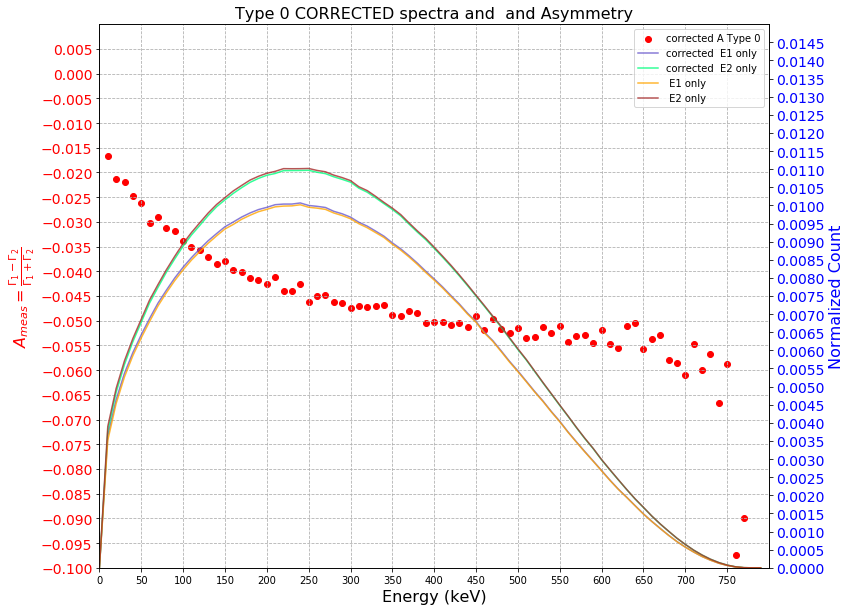

In [56]:
# Create a new figure
fig, ax1 = plt.subplots(figsize=(12, 10))
color2 = 'red'
ax1.scatter(ucnap_item["Evals"], ucnap_item["a_CORRECTED0"], color=color2,  label='corrected A Type 0')
ax1.tick_params(axis='y', labelcolor=color2, labelsize=14)
# Plot the first set of data with the left y-axis
ax2 = ax1.twinx()

color1 = 'blue'
ax2.plot(ucnap_item["Evals"], ucnap_item["correcteN1"] / nEvents, color='slateblue', alpha=0.8, label=r'corrected  E1 only')
ax2.plot(ucnap_item["Evals"], ucnap_item["correcteN2"] / nEvents, color='springgreen', alpha=0.8, label=r'corrected  E2 only')
ax2.plot(ucnap_item["Evals"], ucnap_item["EdepType01;1"] / nEvents, color='orange', alpha=0.8, label=r' E1 only')
ax2.plot(ucnap_item["Evals"], ucnap_item["EdepType02;1"] / nEvents, color='brown', alpha=0.8, label=r' E2 only')

ax1.set_xlabel("Energy (keV)", fontsize=16)
ax2.set_ylabel("Normalized Count", color=color1, fontsize=16)
ax2.tick_params(axis='y', labelcolor=color1, labelsize=14)
ax2.tick_params(axis='x', labelsize=14)
# Create a secondary y-axis for the asymmetry data
# Set limits and ticks for both y-axes
ax1.set_ylim(-0.1, 0.01)
ax1.set_yticks(np.arange(-0.1, 0.01, 0.005))
ax2.set_ylim(0.0, 0.015)
ax2.set_yticks(np.arange(0, 0.0150, 0.0005))
ax1.set_ylabel(r"$A_{meas} = \frac{\Gamma_1 - \Gamma_2}{\Gamma_1 + \Gamma_2}$", color=color2, fontsize=16)
ax1.set_xlim(0, 800)
ax1.set_xticks(np.arange(0, 800, 50))
ax1.grid(linestyle='--')
# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
plt.title('Type 0 CORRECTED spectra and  and Asymmetry', fontsize = 16)
# Show the plot
plt.savefig('./apr/10keVtype0_corrected_spectra_asymmetries.png')
#plt.show()

In [ ]:
ucnaP_df["1"]

In [ ]:
analysingwindow =(180,660)
A_thrown = a_true0_beta_fit * weight_180 # weight_180_i = weight of events in window [180, 660] for "i" type of event
A_mc = (weight_180_type0 * a_type0_fit) + (weight_180_type1 * atype1_fit)
correction = (A_thrown - A_mc)/A_thrown


# Corrections

In [58]:
N_0 = ucnaP_df["1"]["EdepType0;1"].sum()
N_1 = ucnaP_df["1"]["EdepType1;1"].sum()

In [61]:
display(N_0/nEvents)
display(N_1/nEvents)

0.9757884125

0.0162820125

In [59]:
ucnaP_df["1"]["correctedAsym"] = (N_0/nEvents)*(ucnaP_df["1"]["a_CORRECTED0_beta"]) + (N_1/nEvents)*(ucnaP_df["1"]["a_CORRECTED1_beta"]) 

In [50]:
#print(w0*x0_corrected_beta)
print(x0_corrected_beta)
weighted_asym_0 = [a0_corr * w0 for a0_corr in x0_corrected_beta]
print(weighted_asym_0)
delta_thrown = (xTrue_beta - weighted_asym_0) / xTrue_beta

[-0.12321157148154566, -0.12127718408727885, -0.12067419400009416, -0.11922586275220366, -0.11870758118064784, -0.11841417064320713, -0.11833058572562542, -0.11782531778543881]
[-0.12017751733670547, -0.11829076374842563, -0.11770262214139035, -0.11628995568839634, -0.11578443667096969, -0.11549825129466082, -0.11541672463477833, -0.11492389879130183]


TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [55]:
delta_thrown = [(x - y) / x if x != 0 else 0 for x, y in zip(xTrue_beta, weighted_asym_0)]

# Print the result
print(delta_thrown)
a_input = -0.11749
delta_input = [(a_input - weighteda)/a_input for weighteda in weighted_asym_0 ]

[0.0034747004149800306, 0.006207893854607263, 0.010133745945449591, 0.010386310247229446, 0.01360637438483075, 0.013017388584618617, 0.01665666346930235, 0.021349927228261314]


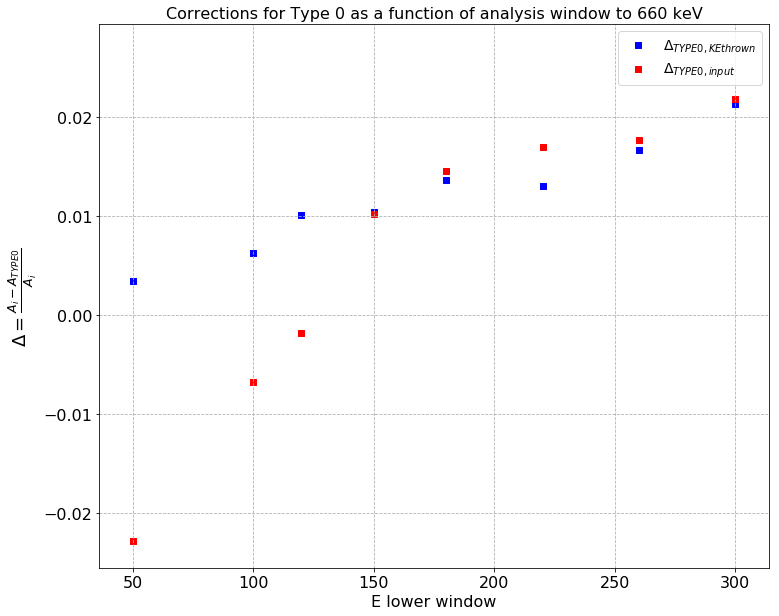

In [63]:
plt.figure(figsize=(12, 10))

plt.scatter(x= E_list, y = delta_thrown,marker = 's', color='blue',label = r'$\Delta_{TYPE 0, KE thrown}$')

plt.scatter(x= E_list, y = delta_input,marker = 's', color='red',label = r'$\Delta_{TYPE 0, input}$')

plt.grid(linestyle = '--')
plt.legend(fontsize = 14)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

#plt.ylabel(r"$\frac{A_{meas}}{\frac{\beta}{2}}$", fontsize=16)
plt.ylabel(r"$ \Delta  =\frac{A_i - A_{TYPE 0} }{A_i}}}$", fontsize=18)

plt.xlabel('E lower window', fontsize = 16)
plt.title(f'Corrections for Type 0 as a function of analysis window to 660 keV', fontsize = 16)
plt.savefig(f'./apr/energy-costh-deadevents-apr09/plot-asymmetry-may-foilposchanged-asym-different/all-asym-delta/correction_type0_diff_window.png')
plt.savefig(f'./apr/energy-costh-deadevents-apr09/plot-asymmetry-may-foilposchanged-asym-different/all-asym-delta/correction_type0_diff_window.eps')

In [65]:
for key in ucnaP_df.keys():
    ucnap_item = ucnaP_df[key]
    ucnap_item["correctedAsym"] = (N_0/nEvents)*(ucnap_item["a_CORRECTED0_beta"]) + (N_1/nEvents)*(ucnap_item["a_CORRECTED1_beta"]) 
    ucnap_item["delta_0"] = ( ucnap_item["a_type0_beta"]- ucnap_item["a_CORRECTED0_beta"])/ucnap_item["a_type0_beta"]

    ucnap_item["delta_1"] = ( ucnap_item["a_type1_beta"]- ucnap_item["a_CORRECTED1_beta"])/ucnap_item["a_type1_beta"]
    ucnap_item["delta"] = ( ucnap_item["a_true0_beta"]- ucnap_item["correctedAsym"])/ucnap_item["a_true0_beta"]

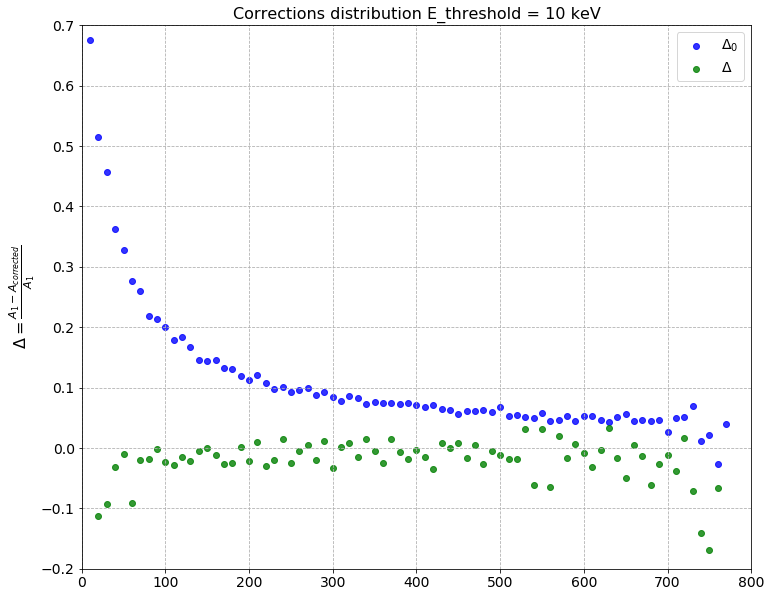

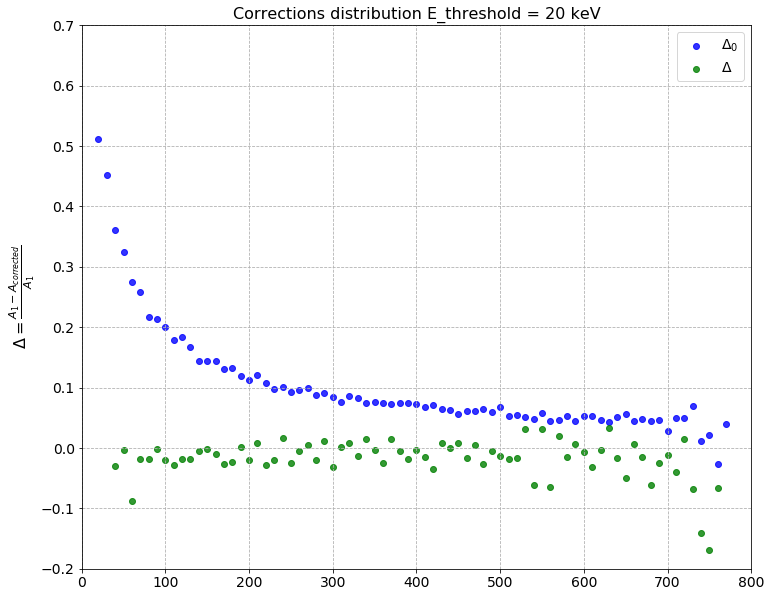

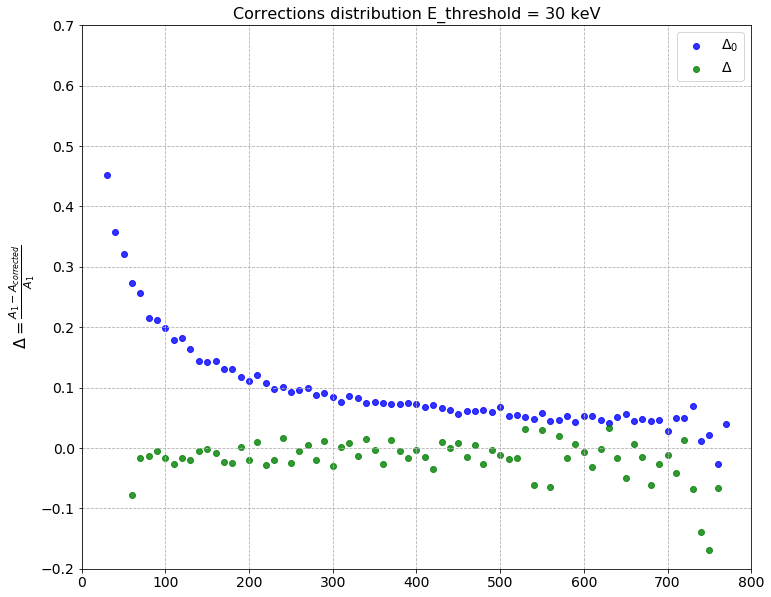

In [73]:
# Loop over keys in ucnaP_df
for key in ucnaP_df.keys():
   ucnap_item = ucnaP_df[key]

    # Create a new figure
   fig = plt.subplots(figsize=(12, 10))
   plt.scatter(ucnap_item["Evals"], ucnap_item["delta_0"], color='blue', alpha=0.8, label=r'$\Delta_0$')
   #plt.scatter(ucnap_item["Evals"], ucnap_item["delta_1"], color='red', alpha=0.8, label='Delta_1')
   plt.scatter(ucnap_item["Evals"], ucnap_item["delta"], color='green', alpha=0.8, label=r'$\Delta$')
   plt.ylabel(r'$\Delta = \frac{A_1 - A_{corrected}}{A_1}$', fontsize = 16)
   plt.ylim(-0.2, 0.7)
   plt.xlim(0,800)
   plt.yticks(fontsize = 14)
   plt.xticks(fontsize = 14)
   plt.grid(linestyle = '--')
   plt.legend(fontsize = 14)
   plt.title(f'Corrections distribution E_threshold = {key}0 keV', fontsize = 16)
    # Show the plot
   plt.savefig(f'./apr/10kev_Correction_distribution_str{key}_threshold.png')
   #plt.show()

In [97]:
ucnaP_df["1"].columns

Index(['KE;1', 'eTrue1;1', 'eTrue2;1', 'EdepType01;1', 'EdepType11;1',
       'EdepType02;1', 'EdepType12;1', 'EdepType0;1', 'EdepType1;1',
       'misEdepType01;1', 'misEdepType11;1', 'misEdepType02;1',
       'misEdepType12;1', 'direct01;1', 'direct11;1', 'direct02;1',
       'direct12;1', 'Evals', 'correcteN01', 'correcteN02', 'correcteN11',
       'correcteN12', 'EMid', 'EMidNew', 'beta', 'a_true0_beta',
       'erra_true0_beta', 'a_direct0_beta', 'erra_direct0_beta',
       'a_type0_beta', 'erra_type0_beta', 'a_CORRECTED0_beta',
       'erra_CORRECTED0_beta', 'a_misid0_beta', 'erra_misid0_beta',
       'a_direct1_beta', 'erra_direct1_beta', 'a_type1_beta',
       'erra_type1_beta', 'a_CORRECTED1_beta', 'erra_CORRECTED1_beta',
       'a_misid1_beta', 'erra_misid1_beta', 'correction_type0',
       'correctedAsym', 'delta', 'delta_0', 'delta_1'],
      dtype='object')

In [63]:
ucnaP_df["1"]["correction_type0"] = (ucnaP_df["1"]["a_CORRECTED0_beta"]/ucnaP_df["1"]["a_type0_beta"] ) -1

0           NaN
1           NaN
2     -0.702876
3     -0.648597
4     -0.508632
         ...   
155   -0.333333
156         NaN
157         NaN
158         NaN
159         NaN
Name: correction_type0, Length: 160, dtype: float64